# Data Preprocessing

### **Data**
* I have three datasets for this Fraud detection project. I have use them by integreating and extracting best feature from the given datasets to create accurate and strong fraud detection models thast handle the unique challenges of both types of transaction.

#### **1. Fraud_Data**
Includes e-commerce transaction data aimed at identifying fraudulent activities.
* user_id: A unique identifier for the user who made the transaction.
* signup_time: The timestamp when the user signed up.
* purchase_time: The timestamp when the purchase was made.
* purchase_value: The value of the purchase in dollars.
* device_id: A unique identifier for the device used to make the transaction.
* source: The source through which the user came to the site (e.g., SEO, Ads).
* browser: The browser used to make the transaction (e.g., Chrome, Safari).
* sex: The gender of the user (M for male, F for female).
* age: The age of the user.
* ip_address: The IP address from which the transaction was made.
* class: The target variable where 1 indicates a fraudulent transaction and 0 indicates a non-fraudulent transaction.

#### **2. IpAddress_to_Country**
Maps IP addresses to countries
* lower_bound_ip_address: The lower bound of the IP address range.
* upper_bound_ip_address: The upper bound of the IP address range.
* country: The country corresponding to the IP address range.

#### **3. creditcard**
Contains bank transaction data specifically curated for fraud detection analysis. 
* Time: The number of seconds elapsed between this transaction and the first transaction in the dataset.
* V1 to V28: These are anonymized features resulting from a PCA transformation. Their exact nature is not disclosed for privacy reasons, but they represent the underlying patterns in the data.
* Amount: The transaction amount in dollars.
* Class: The target variable where 1 indicates a fraudulent transaction and 0 indicates a non-fraudulent transaction.



In [1]:
# import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sys, os 
import warnings
warnings.filterwarnings('ignore')

# get working directory
sys.path.append(os.path.abspath('..'))

# import Utilis
import scripts.data_preprocessing as dp

### Load data

In [2]:
# load data
fraud_data_path = '../data/Fraud_Data.csv'
ip_address_path = '../data/IpAddress_to_Country.csv'
credit_card_path = '../data/creditcard.csv'

fraud_data_df, ip_address_df, credit_card_df = dp.load_data(fraud_data_path, ip_address_path, credit_card_path)

### Datasets Preview

Fraud Dataset Preview

In [3]:
# Make a copy of fraud data set
fraud_df = fraud_data_df.copy()

# datasets preveiw: First five rows of the dataset
fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [4]:
print("Fraud dataset Overview")
dp.data_summary(fraud_df)

Fraud dataset Overview
Shape of the dataset: (151112, 11)

Numerical Column Description:

             user_id  purchase_value            age    ip_address  \
count  151112.000000   151112.000000  151112.000000  1.511120e+05   
mean   200171.040970       36.935372      33.140704  2.152145e+09   
std    115369.285024       18.322762       8.617733  1.248497e+09   
min         2.000000        9.000000      18.000000  5.209350e+04   
25%    100642.500000       22.000000      27.000000  1.085934e+09   
50%    199958.000000       35.000000      33.000000  2.154770e+09   
75%    300054.000000       49.000000      39.000000  3.243258e+09   
max    400000.000000      154.000000      76.000000  4.294850e+09   

               class  
count  151112.000000  
mean        0.093646  
std         0.291336  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  


Unique Values per Column:

user_id           151112
signup_time       151112
pu

IP Address Dataset Preview

In [5]:
ip_address_df.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [6]:
print("Ip Address Dataset Preview")
dp.data_summary(ip_address_df)

Ip Address Dataset Preview
Shape of the dataset: (138846, 3)

Numerical Column Description:

       lower_bound_ip_address  upper_bound_ip_address
count            1.388460e+05            1.388460e+05
mean             2.724532e+09            2.724557e+09
std              8.975215e+08            8.974979e+08
min              1.677722e+07            1.677747e+07
25%              1.919930e+09            1.920008e+09
50%              3.230887e+09            3.230888e+09
75%              3.350465e+09            3.350466e+09
max              3.758096e+09            3.758096e+09


Unique Values per Column:

lower_bound_ip_address    138846
upper_bound_ip_address    138846
country                      235
dtype: int64


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 no

Credit Card Datase preview

In [7]:
credit_card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
print('Credit card dataset overview')
dp.data_summary(credit_card_df)

Credit card dataset overview
Shape of the dataset: (284807, 31)

Numerical Column Description:

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.48

## **Fraud Data Preprocessing**

In [9]:
# Convert signup and purchase time to pandas datetime format
# Create time defference feature between signup and purchase time in seconds
fraud_df = dp.get_fraud_data(fraud_df)
fraud_df.head()

,user_id,signup_time,purchase_time,time_to_first_purchase_days,immediate_purchase,purchase_value,device_id,source,browser,sex,age,ip_address,class,time_to_first_purchase_hours
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,52.160671,0,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,1251.856111
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,0.207685,0,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,4.984444
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,0.000012,1,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,0.000278
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,5.695428,0,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,136.690278
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,50.479873,0,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,1211.516944


### Data Cleaning

#### Handle Missing Value

In [10]:
# check for missing value
fraud_df.isnull().sum()

user_id                         0
signup_time                     0
purchase_time                   0
time_to_first_purchase_days     0
immediate_purchase              0
purchase_value                  0
device_id                       0
source                          0
browser                         0
sex                             0
age                             0
ip_address                      0
class                           0
time_to_first_purchase_hours    0
dtype: int64

**Insight:** There is no missing value in Fraud data

#### Handle Dublication

In [11]:
fraud_df.duplicated().sum()

np.int64(0)

### Exploratory Data Analysis

Univarient Analysis

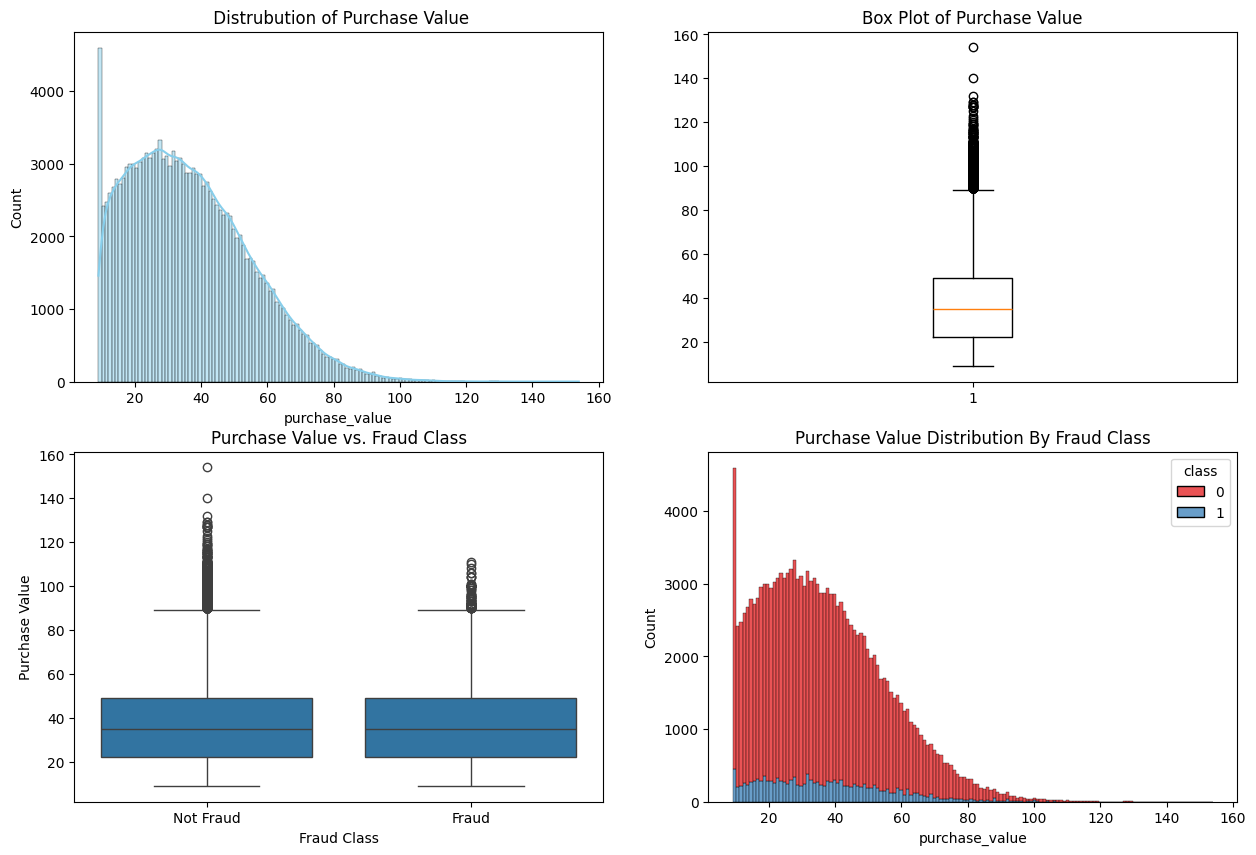

In [12]:
# Purchase value Distribution plot to understand value distribution
dp.purchase_value_visualization(fraud_df)

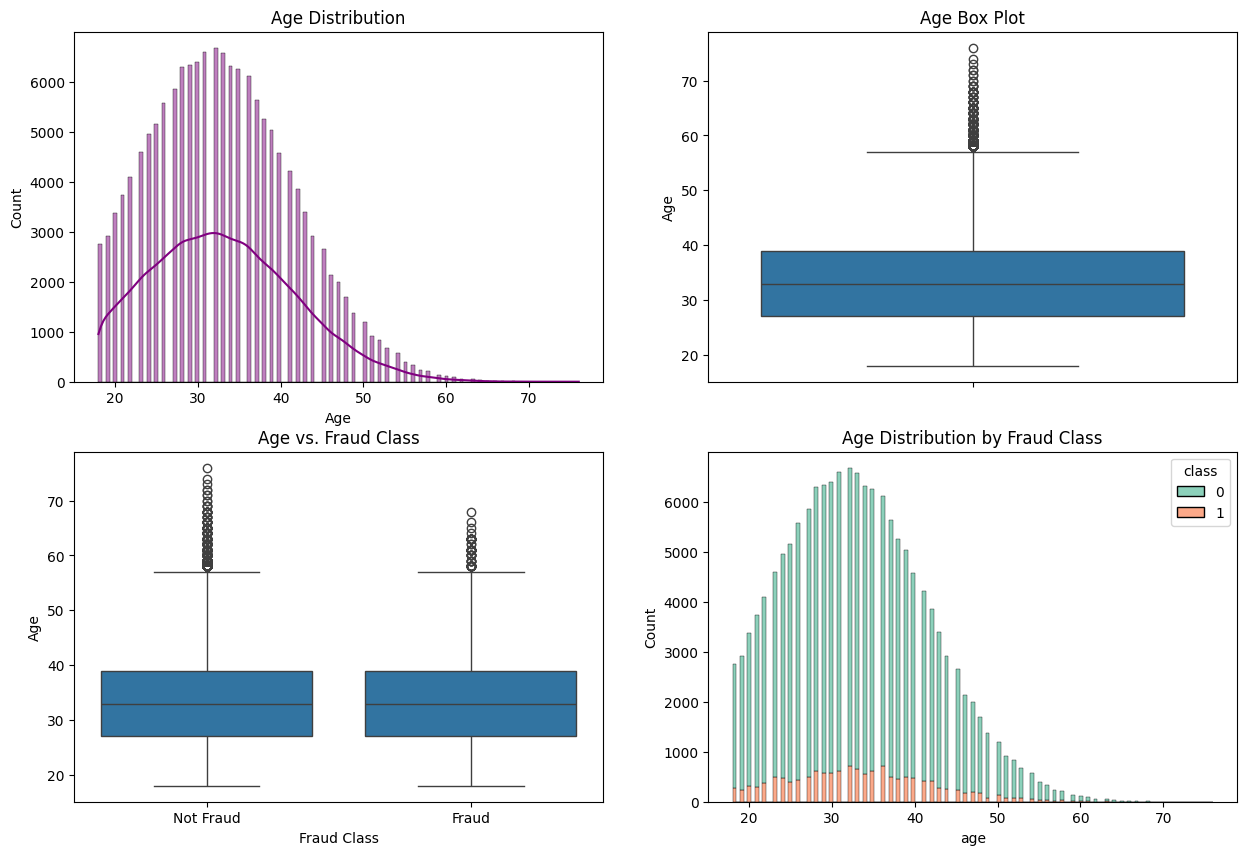

In [13]:
# Age distribution plot to understand the age distribution and relationship between age and fraudlent
dp.age_visualization(fraud_df)

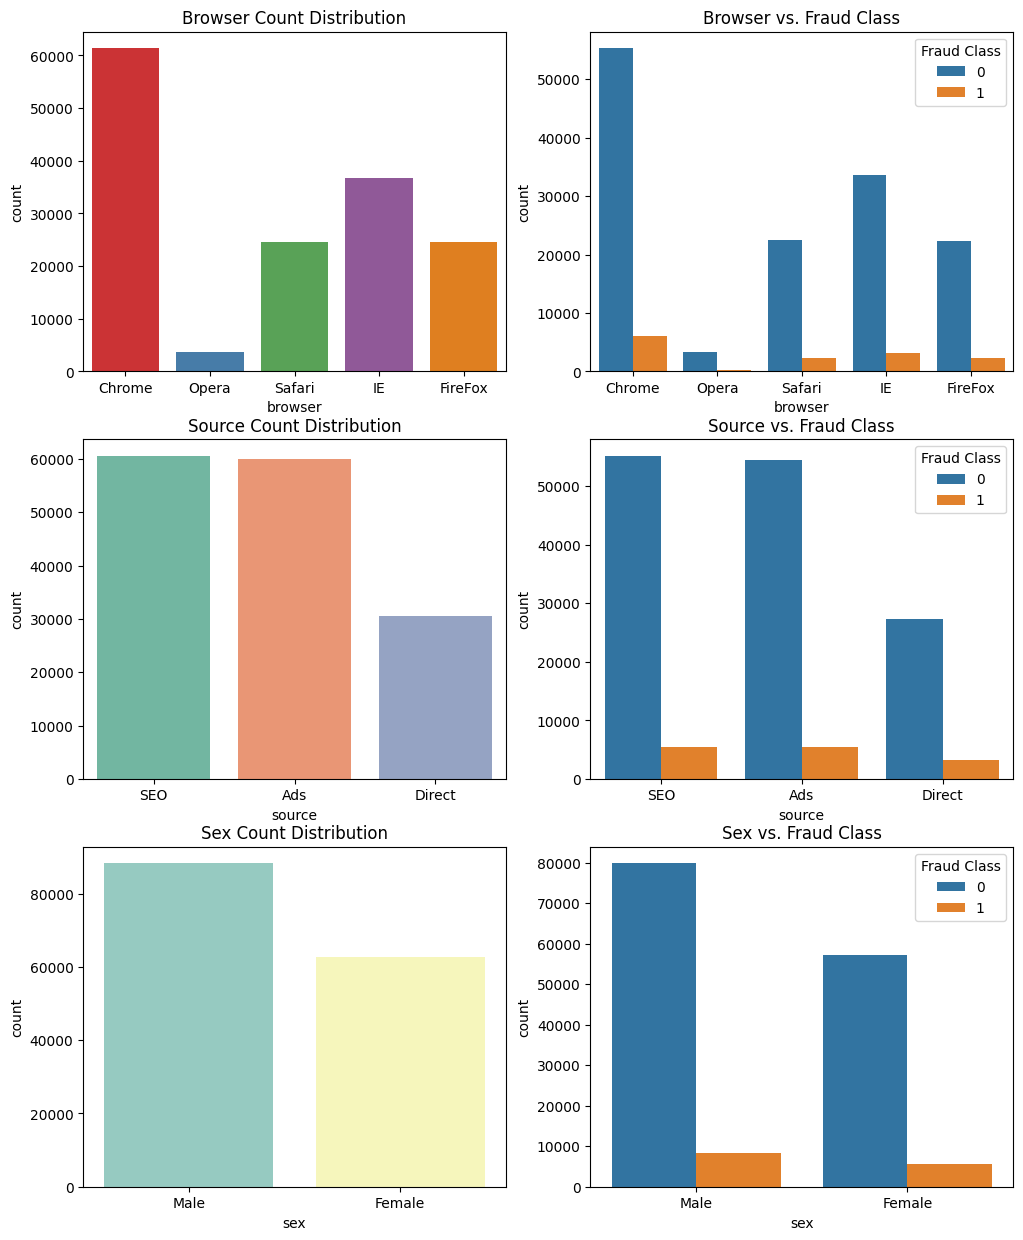

In [14]:
"""
Distribution of Categorical features
    Browser
    Source and
    Sex
"""
dp.categorical_value_visualization(fraud_df)

### Time Series Analysis

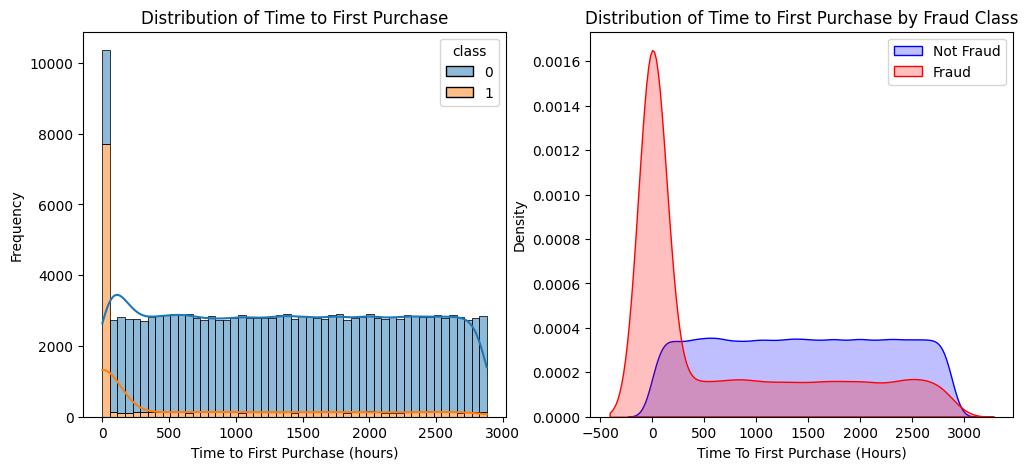

In [15]:
# Time series analysis for the time diffeence between signup and purchase time
dp.time_to_first_purchase_visualization(fraud_df)

**Insight:** As we can clearly see from the above two plot, most pf the fraud transaction occured at the fastest time to purchase after signup

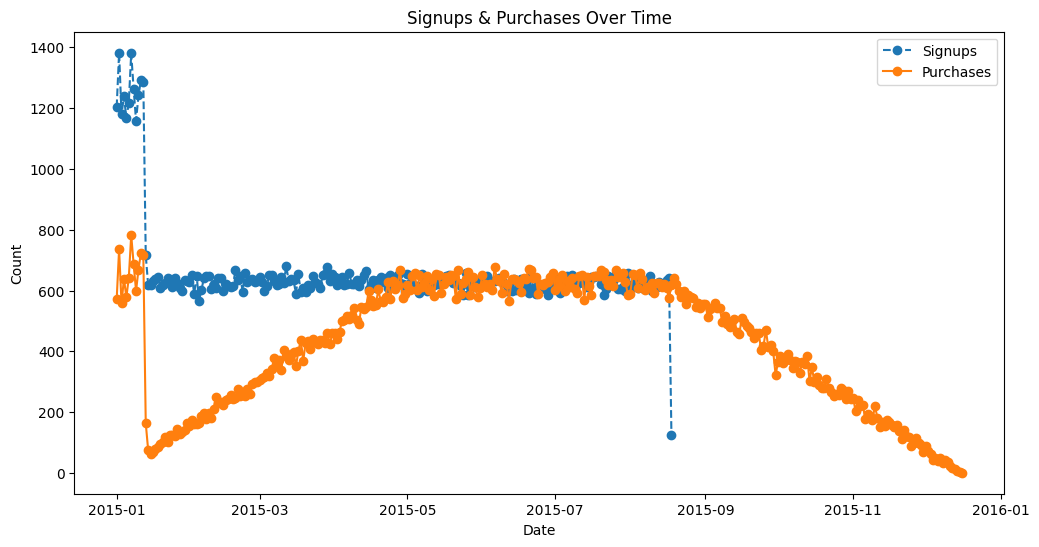

In [16]:
# See trend of signups and purchases over time
dp.signup_purchase_time_trend(fraud_df)

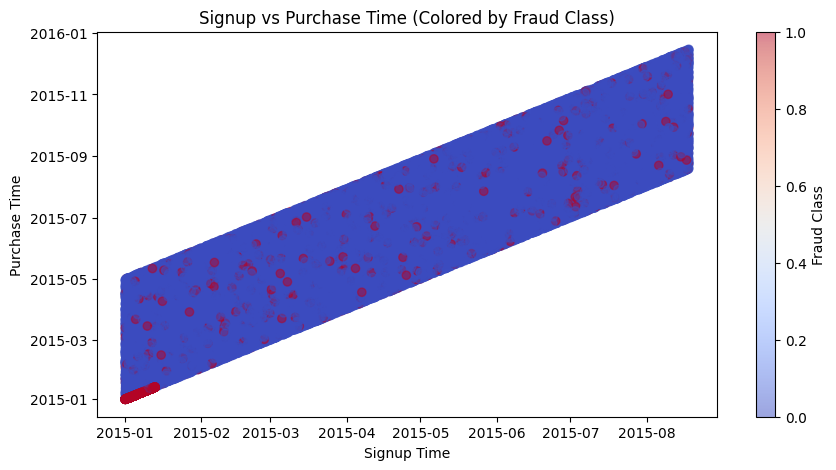

In [17]:
# relationship between signup_time and purchase_time
dp.relation_signup_purchase_time(fraud_df)

### Merge Fraud Dataset with Ip Address dataset

The Fraud_Data dataset was merged with IpAddress_to_Country based on IP address ranges.

1. IP Address Conversion – All IP-related columns were converted to numeric format for compatibility.
2. Merging – Using pd.merge_asof, each transaction’s ip_address was matched with the nearest lower_bound_ip_address.
3. Filtering – Only valid matches where ip_address fell within the defined range were kept.
3. Country Frequency – A country_freq feature was added to track transaction distribution by country.
4. Final Cleanup – Unnecessary columns were removed, keeping only relevant data.

In [18]:
ip_address_df.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [19]:
fraud_df.head()

,user_id,signup_time,purchase_time,time_to_first_purchase_days,immediate_purchase,purchase_value,device_id,source,browser,sex,age,ip_address,class,time_to_first_purchase_hours
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,52.160671,0,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,1251.856111
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,0.207685,0,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,4.984444
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,0.000012,1,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,0.000278
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,5.695428,0,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,136.690278
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,50.479873,0,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,1211.516944


In [20]:
merged_df = dp.merge_data(fraud_df, ip_address_df)
merged_df.head()


,user_id,signup_time,purchase_time,time_to_first_purchase_days,immediate_purchase,purchase_value,device_id,source,browser,sex,age,ip_address,class,time_to_first_purchase_hours,country,country_freq
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,42.039525,0,47,KIXYSVCHIPQBR,SEO,Safari,F,30,1.677886e+07,0,1008.948611,Australia,1844
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,14.255058,0,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,1.684205e+07,0,342.121389,Thailand,291
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,23.119606,0,44,LVCSXLISZHVUO,Ads,IE,M,29,1.684366e+07,0,554.870556,China,12038
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,88.436308,0,55,UHAUHNXXUADJE,Direct,Chrome,F,30,1.693873e+07,0,2122.471389,China,12038
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,118.629387,0,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,1.697198e+07,0,2847.105278,Thailand,291


### Feature Engineering

Key Feature Categories
#### 1. Temporal Features
**Purpose:** Capture time-based patterns often associated with fraudulent behavior.

**New Features Added:**

Time-to-Purchase Granularity:

* *time_to_first_purchase_days:* Days between signup and purchase.

* *time_to_first_purchase_hours:* Hours between signup and purchase.

* *immediate_purchase:* Flag for purchases <1 hour after signup (fraudsters often act quickly).

Time Context:

* *purchase_dayofweek:* Day of the week (0=Monday, 6=Sunday).

* *purchase_is_weekend:* Flag for weekend activity (fraudulent transactions may cluster on weekends).

* *purchase_timeofday:* Categorical time-of-day bins (night/morning/afternoon/evening).

**Rationale:**
Fraudulent actors often exhibit unusual timing patterns (e.g., rapid signup-to-purchase cycles, late-night transactions).

#### 2. Geographic Features
**Purpose:** Identify suspicious geographic mismatches or high-risk regions.

**New Features Added:**

Country Frequency:

* *country_freq:* Number of transactions originating from the user’s country (derived from IP mapping).

**Rationale:**
High-risk countries or unusual IP-country-user mismatches (e.g., a user from a high-fraud country) may indicate fraud.

#### 3. Transaction Value Features
**Purpose**: Flag unusual purchase amounts.

**New Features Added:**


* *log_purchase_value: *Log-transformed purchase value to handle skew.

* *purchase_value_high:* Flag for purchases >95th percentile (outliers).

**Rationale:**
Fraudulent transactions may involve unusually high or low values compared to legitimate purchases.

#### 4. Aggregated Behavioral Features
**Purpose:** Detect anomalies in user/device behavior.

New Features Added:

* *{device_id/ip_address/user_id}_tx_count:* Total transactions per entity.
* *{device_id/ip_address}_unique_users:* Unique users linked to a device/IP.

**Rationale:**
Suspicious patterns include:
A single device/IP making many transactions.
A device/IP associated with multiple users.

#### 5. Demographic Features
Purpose: Capture age-related risk segments.

New Features Added:

* *age_group:* Binned age categories (e.g., "<18", "18-25", "26-35").

**Rationale:**
Certain age groups may correlate with higher fraud risk (e.g., fake accounts with implausible ages).

#### 6. Categorical Feature Engineering
**Purpose:** Encode categorical variables for model compatibility.

Enhancements:

* Time-of-Day Encoding:
* One-hot encoded purchase_timeofday.
* One-hot encoding for source, browser, sex, and age_group.

**Rationale:**
Non-ordinal categories (e.g., browser type) may hide fraud patterns (e.g., fraudsters preferring less common browsers).

#### Removed Features

* signup_time, purchase_time (replaced by derived features).
* user_id, device_id, ip_address (privacy + aggregated features already capture their effects + IDs are typically unique identifiers that do not carry inherent information about the individual or their characteristics).
* Year values (removed because all years are the same).



In [21]:
# engineered data
engineered_fraud_df = dp.feature_engineering(fraud_data_df, ip_address_df)
engineered_fraud_df.head()

,time_to_first_purchase_days,immediate_purchase,purchase_value,source,browser,sex,age,class,country,country_freq,...,purchase_is_weekend,purchase_timeofday,age_group,log_purchase_value,purchase_value_high,device_id_tx_count,device_id_unique_users,ip_address_tx_count,ip_address_unique_users,user_id_tx_count
634,42.039525,0,47,SEO,Safari,F,30,0,Australia,1844,...,1,night,26_35,3.871201,0,1,1,1,1,1
635,14.255058,0,15,SEO,Chrome,F,34,0,Thailand,291,...,0,evening,26_35,2.772589,0,1,1,1,1,1
636,23.119606,0,44,Ads,IE,M,29,0,China,12038,...,1,evening,26_35,3.806662,0,2,2,1,1,1
637,88.436308,0,55,Direct,Chrome,F,30,0,China,12038,...,1,afternoon,26_35,4.025352,0,1,1,1,1,1
638,118.629387,0,51,SEO,Chrome,F,37,0,Thailand,291,...,0,night,36_50,3.951244,0,1,1,1,1,1


In [22]:
engineered_fraud_df.head().T

,634,635,636,637,638
time_to_first_purchase_days,42.039525,14.255058,23.119606,88.436308,118.629387
immediate_purchase,0,0,0,0,0
purchase_value,47,15,44,55,51
source,SEO,SEO,Ads,Direct,SEO
browser,Safari,Chrome,IE,Chrome,Chrome
sex,F,F,M,F,F
age,30,34,29,30,37
class,0,0,0,0,0
country,Australia,Thailand,China,China,Thailand
country_freq,1844,291,12038,12038,291


#### Standard Scaler

In [23]:
maped_fraud_df = dp.numerical_scaler(engineered_fraud_df)
maped_fraud_df.head()

,time_to_first_purchase_days,immediate_purchase,purchase_value,source,browser,sex,age,class,country,country_freq,...,purchase_is_weekend,purchase_timeofday,age_group,log_purchase_value,purchase_value_high,device_id_tx_count,device_id_unique_users,ip_address_tx_count,ip_address_unique_users,user_id_tx_count
634,-0.413800,0,0.549607,SEO,Safari,F,-0.363124,0,Australia,-0.987836,...,1,night,26_35,0.693871,0,-0.259874,-0.259874,-0.235055,-0.235055,0.0
635,-1.180852,0,-1.197335,SEO,Chrome,F,0.101168,0,Thailand,-1.045518,...,0,evening,26_35,-1.417520,0,-0.259874,-0.259874,-0.235055,-0.235055,0.0
636,-0.936126,0,0.385831,Ads,IE,M,-0.479197,0,China,-0.609206,...,1,evening,26_35,0.569837,0,0.116936,0.116936,-0.235055,-0.235055,0.0
637,0.867086,0,0.986342,Direct,Chrome,F,-0.363124,0,China,-0.609206,...,1,afternoon,26_35,0.990129,0,-0.259874,-0.259874,-0.235055,-0.235055,0.0
638,1.700633,0,0.767974,SEO,Chrome,F,0.449387,0,Thailand,-1.045518,...,0,night,36_50,0.847703,0,-0.259874,-0.259874,-0.235055,-0.235055,0.0


#### Encode Categorical column 

In [24]:
# Encode Categorical column 
processed_fraud_df = dp.categorical_encoder(maped_fraud_df)
processed_fraud_df.head()

,time_to_first_purchase_days,immediate_purchase,purchase_value,age,class,country,country_freq,signup_month,signup_day,signup_hour,...,sex_M,purchase_timeofday_afternoon,purchase_timeofday_evening,purchase_timeofday_morning,purchase_timeofday_night,age_group__18,age_group_18_25,age_group_26_35,age_group_36_50,age_group_50_
634,-0.413800,0,0.549607,-0.363124,0,7,-0.987836,0.822662,1.521987,-1.229144,...,0,0,0,0,1,0,0,1,0,0
635,-1.180852,0,-1.197335,0.101168,0,162,-1.045518,-1.390901,1.521987,0.362837,...,0,0,1,0,0,0,0,1,0,0
636,-0.936126,0,0.385831,-0.479197,0,36,-0.609206,-0.505476,0.490935,1.231190,...,1,0,1,0,0,0,0,1,0,0
637,0.867086,0,0.986342,-0.363124,0,36,-0.609206,-0.948188,1.063742,-0.794967,...,0,1,0,0,0,0,0,1,0,0
638,1.700633,0,0.767974,0.449387,0,162,-1.045518,1.265374,-0.883800,0.073386,...,0,0,0,0,1,0,0,0,1,0


In [25]:
processed_fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129146 entries, 634 to 131728
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_to_first_purchase_days   129146 non-null  float64
 1   immediate_purchase            129146 non-null  int64  
 2   purchase_value                129146 non-null  float64
 3   age                           129146 non-null  float64
 4   class                         129146 non-null  int64  
 5   country                       129146 non-null  int64  
 6   country_freq                  129146 non-null  float64
 7   signup_month                  129146 non-null  float64
 8   signup_day                    129146 non-null  float64
 9   signup_hour                   129146 non-null  float64
 10  signup_dayofweek              129146 non-null  int32  
 11  signup_is_weekend             129146 non-null  int64  
 12  purchase_month                129146 non-null  

**Data was ready for the Model training**

### Save Processed Fraud Data

In [26]:
processed_fraud_df.to_csv('../data/processed_fraud_data.csv', index=False) 

## **Credit Card Dataset**

In [27]:
credit_card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [28]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Credit Card data was ready for model training**